# Final Project: Analysis of Udemy Course Data
### Josh White -- CSPB 3022

## Project Topic

Say I hypothetically decide that being a data scientist is not my jam and am now trying to determine which field I want to embark on becoming an expert in now. The kicker is I can only afford to do it by using Massive Open Online Course (MOOC) services. In order to make the most informed decision about which potential field I want to study next, I want to use some of the data science skills I will soon be leaving behind to check if there are any relationships based on a specific subject. I will turn to a group of datasets that cover Udemy course info for five different fields: Business, Finance/Accounting, Software Development, IT Software, and Lifestyle. My main goal is to test the following hypotheses:

1. The data contains no relationships for predicting course price.
2. The data contains a relationship for predicting course rating.
3. The data contains a relationship for accurately classifying course subject.

These three research questions are enough to tell me whether there is some secret subject that is more superior than the others. This is important because it will help me pick the profession that is least likely to be as bad as data science (just kidding, of course). All of the variables above, with the exception of subject, are continuous data types. Knowing this, and the nature of the questions I am trying to answer, I will perform a multiple linear regression analysis for the first two hypotheses, and I will perform a multiclass logistic regression analysis for the last one. If the two models don't give me good results, I will move on to other models for comparison, such as non-linear regression and a random forest analysis for the first two hypotheses and a K-Nearest Neighbors, linear and quadratic discriminant analysis for the last hypothesis.

## Data Summary

**Dataset Links:**
- _Finance & Accounting Courses - Udemy (13K+ course)_ (https://www.kaggle.com/jilkothari/finance-accounting-courses-udemy-13k-course)

- _Business Courses - Udemy (10k courses)_ (https://www.kaggle.com/jilkothari/business-courses-udemy-10k-courses)

- _Development Category (10k courses) from Udemy_ (https://www.kaggle.com/jilkothari/udemy-courses-development)

- _IT & Software Courses Udemy - 22k+ courses_ (https://www.kaggle.com/jilkothari/it-software-courses-udemy-22k-courses)

- _Lifestyle Courses - Udemy (39K+ course)_ (https://www.kaggle.com/jilkothari/lifestyle-courses-udemy-39k-course)

**Dataset Author:** Jil Kothari (https://www.kaggle.com/jilkothari)

This set of data takes five different datasets, each with the same features but for a different subject area, adds a column for "Subject" and combines them into one larger dataset. This larger dataset has 72190 data points and is comprised of 21 different features describing different aspects of individual courses, where each row in the table is course with a unique course ID number, title and URL. The rest of the columns are data such as price of course, average rating, number of reviews, and number of subscribers. They are all summarized below:

| Column Name                  | Description                                   | Data Type | Variable Type | Unique Values |
|------------------------------|-----------------------------------------------|-----------|---------------|---------------|
| id                           | Course ID                                     | integer   | ordinal       | 72190         |
| title                        | Course Title                                  | string    | nominal       | 71886         |
| url                          | Course URL                                    | string    | nominal       | 72190         |
| is_paid                      | Whether the course is free or paid            | boolean   | binary        | 2             |
| num_subscribers              | Number of subscribers                         | integer   | discrete      | 12696         |
| avg_rating                   | Average course rating                         | float     | continuous    | 6017          |
| avg_rating_recent            | Reflects recent changes to average rating     | float     | continuous    | 51185         |
| rating                       | Course rating                                 | float     | continuous    | 51185         |
| num_reviews                  | Number of reviews                             | integer   | discrete      | 3051          |
| is_wishlisted                | Shows if course is wishlisted                 | boolean   | binary        | 1             |
| num_published_lectures       | Number of lectures                            | integer   | discrete      | 520           |
| num_published_practice_tests | Number of practice tests offered              | integer   | discrete      | 7             |
| created                      | Time of course creation                       | datetime  | continuous    | 72159         |
| published_time               | Date that the course was published            | datetime  | continuous    | 72149         |
| discounted_price_amount      | Discounted price a course is being offered at | integer   | continuous    | 86            |
| discounted_price_currency    | Currency of price discount                    | string    | nominal       | 1             |
| discount_price_string        | String of discounted price                    | string    | nominal       | 85            |
| price_detail_amount          | Original course price                         | integer   | continuous    | 37            |
| price_detail_currency        | Currency of price detail                      | string    | nominal       | 1             |
| price_detail_string          | String of price detail                        | string    | nominal       | 37            |
| subject                      | Course subject                                | string    | nominal       | 5             |


## Preliminary EDA

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import scipy.stats
import math

I first want to import my data and then get a brief look to make sure it read in correctly. I also want to add the 'Subject' category for each as I read them in.

In [2]:
df_development = pd.read_csv("../Udemy/Development.csv")
df_development['Subject'] = "Development"
#df_development.describe()

In [3]:
df_business = pd.read_csv("../Udemy/Business.csv")
df_business['Subject'] = "Business"
#df_business.describe()

In [4]:
df_finance_accounting = pd.read_csv("../Udemy/FinanceAccounting.csv")
df_finance_accounting['Subject'] = "Finance and Accounting"
#df_finance_accounting.describe()

In [5]:
df_it_sw = pd.read_csv("../Udemy/ItSoftware.csv")
df_it_sw['Subject'] = "IT and Software"
#df_it_sw.describe()

In [6]:
df_lifestyle = pd.read_csv("../Udemy/Lifestyle.csv")
df_lifestyle['Subject'] = "Lifestyle"
#df_lifestyle.describe()

I then want to combine each subject into one large dataframe, shuffle the data and reset the indices. Then describe it and show the head.

Part 3 addition: I want to sample down each dataset to the size of all the others when I combine them into one dataframe. This way, there is no imbalance between all the data.

In [13]:
development_size = df_development.shape[0]
business_size = df_business.shape[0]
finance_size = df_finance_accounting.shape[0]
it_sw_size = df_it_sw.shape[0]
lifestyle_size = df_lifestyle.shape[0]

print('Development size: ' + str(development_size))
print('Business size   : ' + str(business_size))
print('Finance size    : ' + str(finance_size))
print('IT/SW size      : ' + str(it_sw_size))
print('Lifestyle size  : ' + str(lifestyle_size))

sample_size = np.amin([development_size, business_size, finance_size, it_sw_size, lifestyle_size])

print('Final sample size: ' + str(sample_size))


Development size: 9932
Business size   : 9447
Finance size    : 13608
IT/SW size      : 22853
Lifestyle size  : 39689
Final sample size: 9447


In [27]:
df_combined = pd.concat([df_development.sample(n=sample_size), 
                         df_business.sample(n=sample_size),
                         df_finance_accounting.sample(n=sample_size), 
                         df_it_sw.sample(n=sample_size), 
                         df_lifestyle.sample(n=sample_size)])
df_combined = df_combined.sample(frac=1).reset_index(drop=True)
df_combined.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,4.723500e+04,4.723500e+04,47235.000000,47235.000000,47235.000000,47235.000000,47235.000000,47235.000000,43591.000000,46085.000000
mean,1.685381e+06,3.859585e+03,3.955548,3.942666,3.942666,331.734688,38.950969,0.128633,489.380010,4658.966692
std,9.391298e+05,1.448619e+04,0.959659,0.969626,0.969626,2778.584839,52.449462,0.679150,220.308106,3102.965335
min,2.762000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,9.083000e+05,9.500000e+01,3.800000,3.778755,3.778755,10.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.631628e+06,6.980000e+02,4.200000,4.184380,4.184380,29.000000,24.000000,0.000000,455.000000,3200.000000
75%,2.467496e+06,2.863500e+03,4.450000,4.461875,4.461875,107.000000,44.000000,0.000000,455.000000,8640.000000
max,3.594524e+06,1.086954e+06,5.000000,5.000000,5.000000,314098.000000,891.000000,6.000000,3200.000000,12800.000000


In [28]:
df_combined.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,...,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency,Subject,is_wishlisted,discount_price__price_string,price_detail__price_string
0,783800,Learn 3D Modelling & Rigging in Blender 2.8x,/course/learn-3d-modelling-rigging/,True,1322,4.15000,4.20604,4.20604,37,27,...,2016-03-06T07:08:49Z,2016-03-07T23:07:42Z,490.0,INR,1280.0,INR,Lifestyle,False,₹490,"₹1,280"
1,647104,How to Apply the 80/20 Rule to Grow Your Onlin...,/course/8020-business-entrepreneur/,True,1932,4.10000,3.86439,3.86439,58,36,...,2015-10-21T18:58:35Z,2015-10-26T22:52:48Z,455.0,INR,3200.0,INR,Business,False,₹455,"₹3,200"
2,1229768,Strategic Cost Management for Procurement and ...,/course/strategic-cost-management-for-procurem...,True,1774,4.25269,4.26677,4.26677,543,13,...,2017-05-25T20:18:59Z,2017-05-29T15:24:15Z,455.0,INR,8640.0,INR,IT and Software,False,₹455,"₹8,640"
3,2545299,Learn How to Invest in Tax Lien,/course/learn-how-to-invest-in-tax-lien-in-30-...,True,32,4.00000,4.09838,4.09838,10,30,...,2019-09-05T16:46:40Z,2019-09-18T20:31:45Z,NaN,NaN,1920.0,INR,Finance and Accounting,False,NaN,"₹1,920"
4,1040480,Alteryx: Self-Service Analytics In Your Hands,/course/alteryx-self-service-analytics-in-your...,True,4542,4.45052,4.42193,4.42193,1257,21,...,2016-12-14T01:39:37Z,2017-01-04T22:48:34Z,468.0,INR,4800.0,INR,IT and Software,False,₹468,"₹4,800"


Then, since I can't glean any useful information from the variables _id_, _title_, _url_, and the price strings, I will remove them from the data. I also don't think _is_paid_ will be of much use to me, but I find it interesting. So I will pull it out into it's own dataframe and then drop it from the larger dataframe.

In [29]:
df_isPaid = df_combined[['is_paid', 'Subject']].copy(deep=True)
df_combined_dropped = df_combined.drop(['id', 'title', 'url', 'is_paid', 'discount_price__price_string', 'price_detail__price_string'],axis=1)
df_combined_dropped

,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency,Subject,is_wishlisted
0,1322,4.15000,4.20604,4.20604,37,27,0,2016-03-06T07:08:49Z,2016-03-07T23:07:42Z,490.0,INR,1280.0,INR,Lifestyle,False
1,1932,4.10000,3.86439,3.86439,58,36,0,2015-10-21T18:58:35Z,2015-10-26T22:52:48Z,455.0,INR,3200.0,INR,Business,False
2,1774,4.25269,4.26677,4.26677,543,13,0,2017-05-25T20:18:59Z,2017-05-29T15:24:15Z,455.0,INR,8640.0,INR,IT and Software,False
3,32,4.00000,4.09838,4.09838,10,30,0,2019-09-05T16:46:40Z,2019-09-18T20:31:45Z,NaN,NaN,1920.0,INR,Finance and Accounting,False
4,4542,4.45052,4.42193,4.42193,1257,21,0,2016-12-14T01:39:37Z,2017-01-04T22:48:34Z,468.0,INR,4800.0,INR,IT and Software,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47230,1565,4.33784,4.30821,4.30821,221,18,0,2015-01-17T03:46:29Z,2015-02-17T05:15:27Z,455.0,INR,3520.0,INR,IT and Software,False
47231,834,3.50000,3.50000,3.50000,1,10,0,2020-01-08T14:39:21Z,2020-01-11T20:19:34Z,455.0,INR,6400.0,INR,IT and Software,False
47232,410,4.50000,4.42142,4.42142,84,5,0,2020-05-04T06:15:54Z,2020-05-15T03:32:52Z,490.0,INR,2880.0,INR,Lifestyle,False
47233,39,4.00000,3.81410,3.81410,3,82,0,2020-03-17T04:43:59Z,2020-03-18T16:34:21Z,490.0,INR,1280.0,INR,Lifestyle,False


Since there is a lot of data slapped together from multiple datasets here, I want to do a quick check for the number of missing values that might be floating around in the dataset.

In [30]:
df_combined_dropped.isnull().sum()

num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          3644
discount_price__currency        3644
price_detail__amount            1150
price_detail__currency          1150
Subject                            0
is_wishlisted                   9447
dtype: int64

Since the feature _is_wishlisted_ has a large amount of null values, let us dig a little deeper to see if it is even worth keeping at all.

In [31]:
print(df_combined_dropped.is_wishlisted.unique())

[False nan]


It appears there are no entries with True values for this feature... That shows that it will not give us any useful info and that it can be dropped with no tears shed.

In [32]:
df_combined_dropped2 = df_combined_dropped.drop(['is_wishlisted'], axis=1)

Next, I want to take a closer look at the price features. Looking at the printout of the dataset, it looks like the currency of most of the prices is INR. I want to identify which prices are not in USD and convert them to USD. I can then remove the currency columns and have pricing data I can better comprehend.

But first, these are the only other features with null values, and since there are far less null values than total values, I am ok with just dropping any row with a null value and still having plenty of data.

In [33]:
df_combined_dropped3 = df_combined_dropped2.dropna()
print("Number of data points after dropping all NaNs: " + str(df_combined_dropped3.shape[0]))

Number of data points after dropping all NaNs: 43591


In [34]:
print(df_combined_dropped3.discount_price__currency.unique())
print(df_combined_dropped3.price_detail__currency.unique())

['INR']
['INR']


It appears that ALL of the price data is in INR. That means that we can apply the same conversion function to each price value to convert it to USD. As of April 14, 1 Indian Rupee is equivalent to 0.013 USD. After we make the conversion to USD, we no longer need the currency designator features.

In [35]:
def inr2usd(x):
    return x * 0.013


df_combined_usd = df_combined_dropped3.copy(deep=True)
df_combined_usd[['discount_price__amount', 'price_detail__amount']] = df_combined_dropped3[['discount_price__amount', 'price_detail__amount']].apply(inr2usd, axis=1)
df_combined_usd = df_combined_usd.drop(['discount_price__currency', 'price_detail__currency'], axis=1)

The last thing I would like to remove is the _rating_ column. From the looks of it, it appears to be an exact copy of the _avg_rating_recent_ feature. But just to be sure, I will check that this is the case.

In [36]:
df_ratings_diff = df_combined_usd['avg_rating_recent'] - df_combined_usd['rating']
df_ratings_diff.mean()

0.0

The average difference between the two categories is zero... They are exactly the same, meaning the _rating_ column can be removed.

In [37]:
df_combined_usd_dropped = df_combined_usd.drop(['rating'], axis=1)

Before we call the data good to go, let's make sure there are no crazy outliers skewing our data in funny ways. Looking at the description further up, it appears that there might be some outliers in the _num_subscribers_, _num_reviews_ and the pricing categories. Let's take a look.

In [38]:
df_combined_usd_dropped.nlargest(10, 'num_subscribers')

,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Subject
38690,1086954,4.56326,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,5.915,112.32,Development
6608,690595,4.62689,4.62567,69172,51,0,2015-07-02T23:31:01Z,2015-09-21T21:10:01Z,5.915,41.60,Development
2528,503553,4.45281,4.45310,119137,252,0,2016-07-25T16:28:18Z,2016-08-02T00:09:38Z,6.370,112.32,Lifestyle
47117,497195,4.56571,4.57203,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,5.915,112.32,Development
8707,477510,4.21209,4.19934,18951,147,0,2016-06-20T05:04:52Z,2016-09-13T00:39:02Z,5.915,112.32,Development
10390,417746,4.57687,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,6.006,112.32,Development
40480,407236,4.54529,4.54246,99957,63,0,2016-06-10T01:26:59Z,2017-01-23T00:20:05Z,6.370,112.32,Lifestyle
2970,383073,4.58310,4.59310,86226,165,0,2016-07-13T05:22:58Z,2016-09-18T17:36:23Z,6.006,112.32,Development
14234,374836,4.47080,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,5.915,112.32,Business
42403,372902,4.54790,4.54642,83301,138,0,2016-05-23T01:15:34Z,2016-06-20T19:15:33Z,5.915,112.32,IT and Software


It looks like the largest entry in _num_subscribers_ is almost twice the size of the second highest entry! That is sure to skew things. What about the pricing categories?

In [39]:
df_combined_usd_dropped.nlargest(10, 'price_detail__amount')

,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Subject
43378,1757,3.95000,3.85037,89,11,0,2018-05-29T07:17:55Z,2018-06-27T21:17:27Z,9.555,166.40,Lifestyle
29832,67634,4.37709,4.37468,8195,391,0,2017-05-17T01:18:13Z,2017-09-26T23:13:00Z,8.372,158.08,Development
23019,81732,4.49178,4.53056,4419,695,0,2012-06-10T19:40:50Z,2012-10-28T00:13:03Z,8.190,153.92,Development
40729,5663,4.50000,4.48658,293,66,0,2017-10-24T19:09:16Z,2018-06-10T21:20:39Z,8.827,153.92,Lifestyle
1706,65638,4.42163,4.41672,11423,246,0,2015-03-12T22:10:05Z,2015-08-20T20:55:19Z,7.943,149.76,Development
1709,96,4.38889,4.21629,9,154,0,2020-02-06T12:14:17Z,2020-06-29T21:39:40Z,8.645,149.76,Lifestyle
5750,3106,4.65000,4.68723,134,17,0,2017-06-14T22:54:06Z,2017-06-26T16:34:27Z,8.645,149.76,Lifestyle
12313,20823,4.56923,4.55498,517,229,0,2018-08-29T09:44:49Z,2018-11-03T01:40:49Z,7.943,149.76,Development
12330,23254,4.48387,4.43222,553,160,0,2017-11-02T20:35:09Z,2017-11-03T20:32:16Z,8.645,149.76,Lifestyle
14604,48681,4.70915,4.70460,5384,396,0,2018-04-17T14:56:28Z,2018-05-23T23:09:19Z,7.943,149.76,Development


In [40]:
df_combined_usd_dropped.nlargest(10, 'discount_price__amount')

,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Subject
549,1,5.00000,5.00000,1,9,0,2016-07-01T18:31:55Z,2016-10-25T21:05:09Z,41.6,112.32,Lifestyle
1339,480,4.33333,4.14615,9,124,0,2020-07-19T13:43:08Z,2020-08-08T22:29:45Z,41.6,112.32,IT and Software
1380,38,4.10000,4.25492,10,14,0,2017-09-07T11:24:56Z,2017-10-23T21:26:46Z,41.6,112.32,IT and Software
1550,344,4.55263,4.53719,101,53,0,2018-12-09T14:32:28Z,2018-12-20T02:07:17Z,41.6,112.32,Finance and Accounting
1796,59,4.83333,4.91719,6,15,0,2015-03-02T01:29:29Z,2015-03-03T19:54:14Z,41.6,112.32,Business
2028,13342,4.50000,4.52642,375,259,0,2018-04-11T16:01:27Z,2018-06-13T01:07:24Z,41.6,112.32,Development
2196,21,4.55556,4.49587,9,41,0,2019-06-03T13:21:13Z,2020-08-09T00:49:39Z,41.6,112.32,Lifestyle
2516,1490,4.46154,4.48568,304,40,0,2019-10-12T15:31:39Z,2019-10-16T01:38:55Z,41.6,112.32,Finance and Accounting
2746,341,4.72917,4.64714,77,0,3,2019-03-24T11:41:03Z,2019-04-26T13:45:04Z,41.6,112.32,Business
3451,168,4.30000,4.31609,39,35,0,2017-01-21T08:00:25Z,2017-07-02T14:29:35Z,41.6,112.32,Business


It appears that these have a pretty high concentration in the higher values. So the only value that needs to be dropped is the one in _num_subscribers_. After that, we can get another good look at our data.

In [47]:
drop_index = df_combined_usd_dropped[df_combined_usd_dropped.num_subscribers == 1086954].index[0]
df_combined_final = df_combined_usd_dropped.drop(drop_index)
df_combined_final.describe()

,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,43590.000000,43590.000000,43590.000000,43590.000000,43590.000000,43590.000000,43590.000000,43590.000000
mean,3891.536109,3.961458,3.947318,333.272173,39.742923,0.131705,6.361950,60.516977
std,13801.012759,0.930972,0.941358,2448.424826,53.158077,0.689005,2.864037,39.670326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.915000,16.640000
25%,100.000000,3.800000,3.771490,10.000000,14.000000,0.000000,5.915000,20.800000
50%,726.000000,4.194440,4.178530,30.000000,25.000000,0.000000,5.915000,45.760000
75%,2892.000000,4.450000,4.456100,108.000000,45.000000,0.000000,5.915000,112.320000
max,690595.000000,5.000000,5.000000,128705.000000,891.000000,6.000000,41.600000,166.400000


Now, I want to run some correlations on the data to see if there are any notable connections present in the data at a glance. This will help me see if there are any further avenues of exploration I want to take.

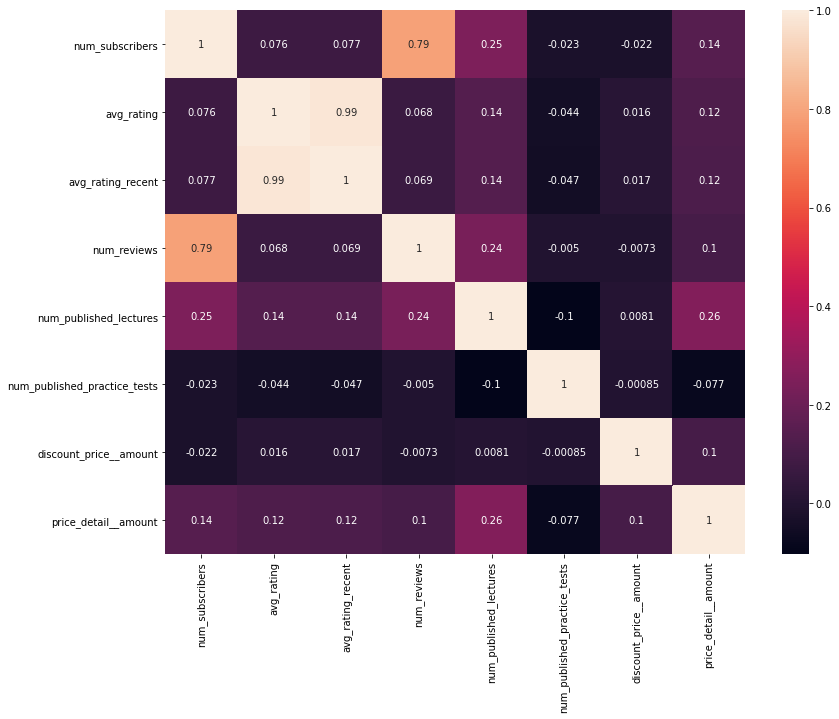

In [48]:
df_combined_final_correlated = df_combined_final.corr()
plt.figure(figsize = (13,10))
ax = sns.heatmap(df_combined_final_correlated, xticklabels=df_combined_final_correlated.columns, 
            yticklabels=df_combined_final_correlated.columns, annot=True);

The above heatmap shows me some things that I would have already guessed: more course subscribers means more course reviews, and that _avg_rating_ strongly matches with _avg_rating_recent_. _avg_rating_ vs _avg_rating_recent_ and _num_subscribers_ vs _num_reviews_ are the only two joint datasets with correlations above 0.5. Thus, they are the only significantly related fields.

Just to be extra sure that there aren't any other underlying correlations, I will shotgun it and scatterplot every variable against one another. Since this process takes a long time with this much data, I will randomly sample only 10,000 data points. This should still give me good results.

<Figure size 936x720 with 0 Axes>

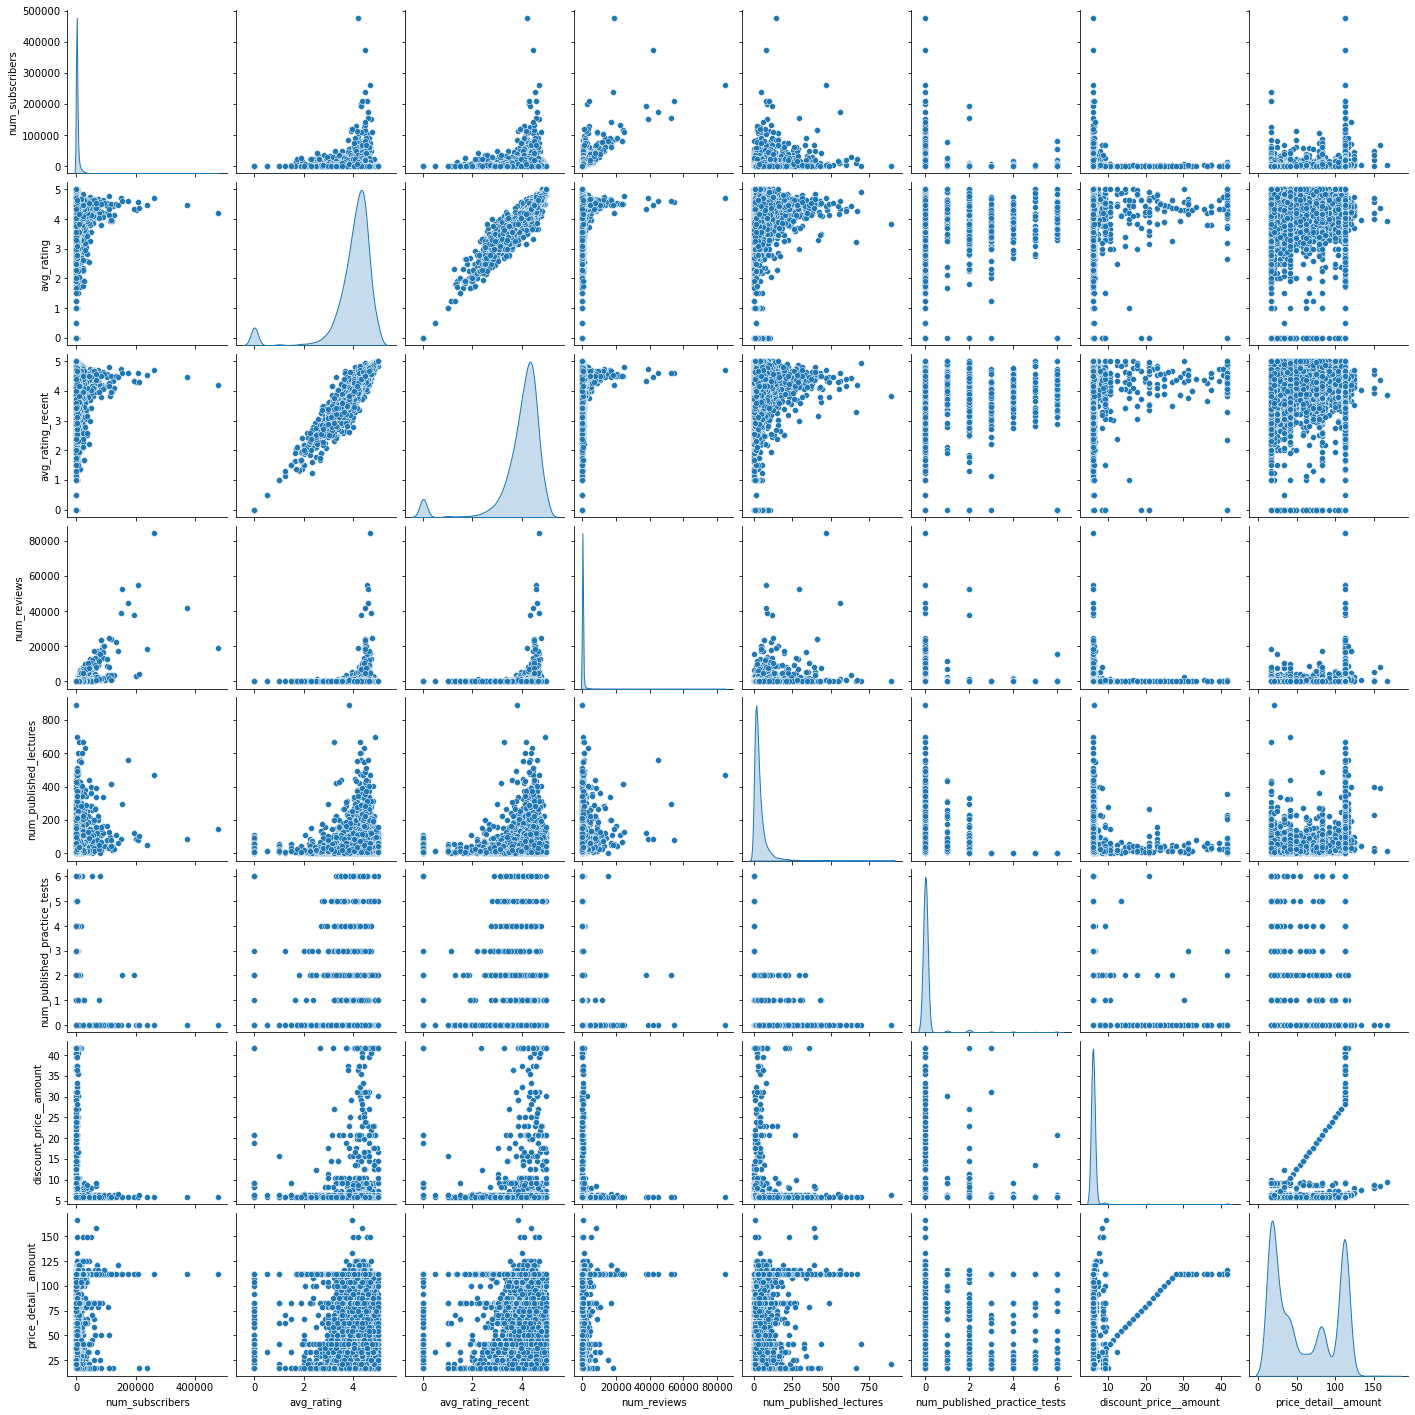

In [49]:
plt.figure(figsize = (13,10))
ax = sns.pairplot(df_combined_final.sample(10000), diag_kind='kde');

The scatter plots above show a few interesting points, which I can discuss later. I also want to plot the combined data, but colored based on each subject to see if there is any underlying clustering.

<Figure size 936x720 with 0 Axes>

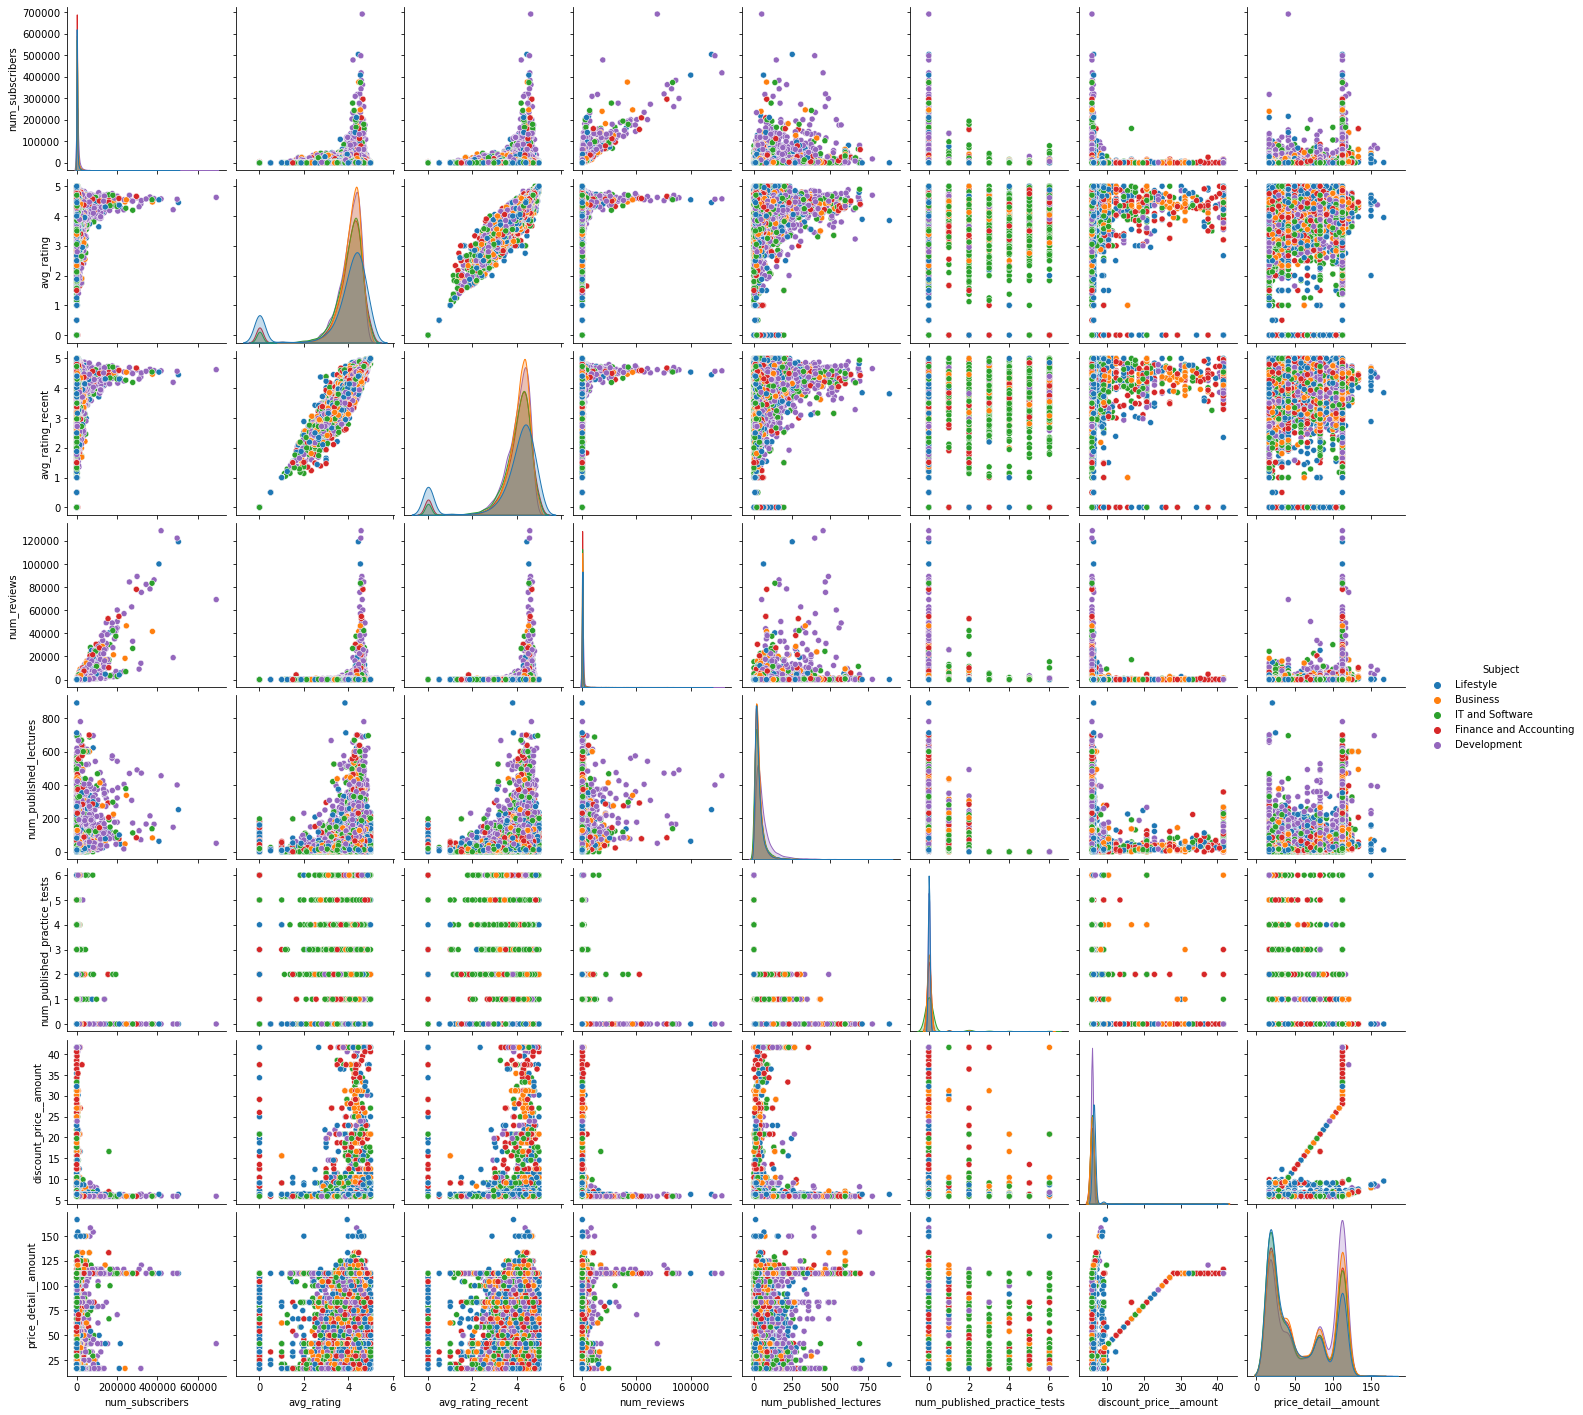

In [50]:
plt.figure(figsize = (13,10))
ax = sns.pairplot(df_combined_final, diag_kind='kde', hue='Subject');

The next step would be to get a closer at the distributions for each factor individually.

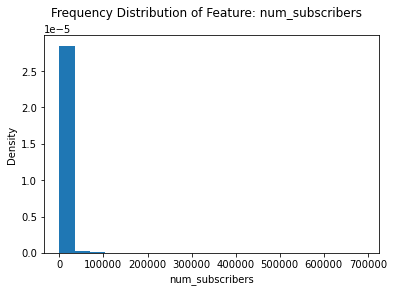

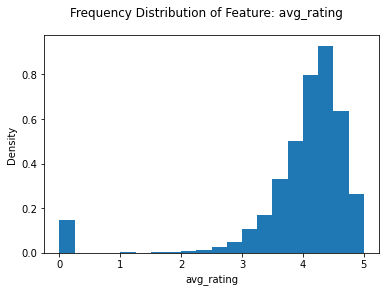

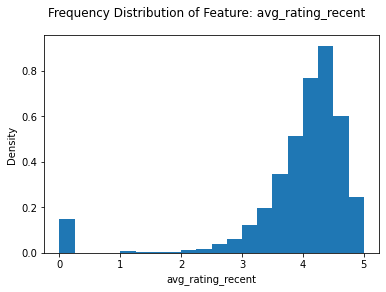

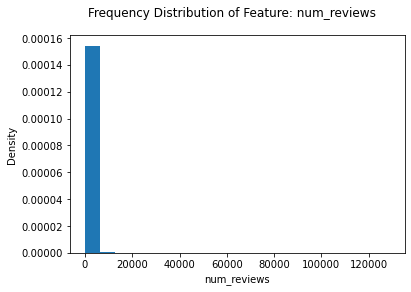

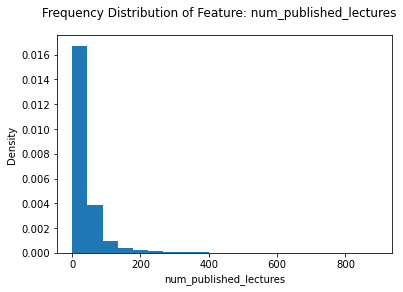

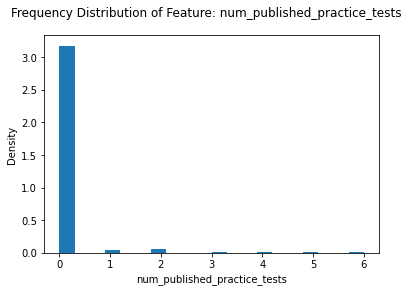

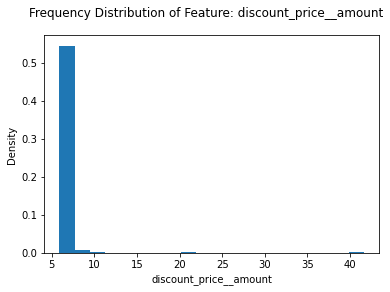

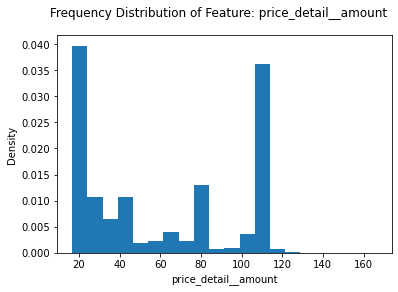

In [354]:
def plotHist(x):
    fig = plt.figure();
    plt.suptitle(f'Frequency Distribution of Feature: {x}')
    plt.xlabel(x)
    plt.ylabel('Density')
    plt.hist(df_combined_final[x], density=True, bins=20);

factors = ['num_subscribers', 'avg_rating', 'avg_rating_recent', 'num_reviews', 'num_published_lectures', 'num_published_practice_tests', 'discount_price__amount', 'price_detail__amount']

for i in factors:
    plotHist(i)


Now I will create a new dataframe for each individual subject and generate a heatmap for each one, just to be completely certain that there are no correlations amongst an individual subject that are washed out by combining them together.

In [52]:
df_development2 = df_combined_final[df_combined_final['Subject'] == 'Development'].drop(['Subject'],axis=1)
df_business2 = df_combined_final[df_combined_final['Subject'] == 'Business'].drop(['Subject'],axis=1)
df_finance_accounting2 = df_combined_final[df_combined_final['Subject'] == 'Finance and Accounting'].drop(['Subject'],axis=1)
df_it_sw2 = df_combined_final[df_combined_final['Subject'] == 'IT and Software'].drop(['Subject'],axis=1)
df_lifestyle2 = df_combined_final[df_combined_final['Subject'] == 'Lifestyle'].drop(['Subject'],axis=1)

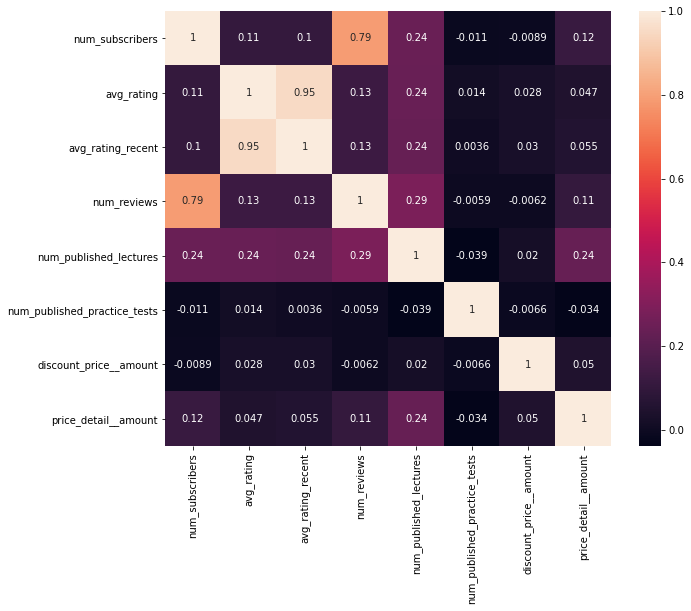

In [53]:
df_development_correlated = df_development2.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(df_development_correlated, xticklabels=df_development_correlated.columns, 
            yticklabels=df_development_correlated.columns, annot=True);

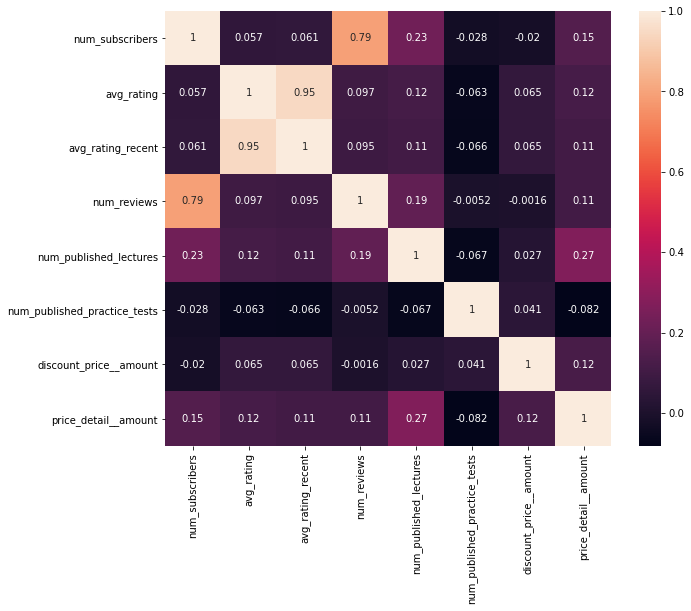

In [54]:
df_business_correlated = df_business2.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(df_business_correlated, xticklabels=df_business_correlated.columns, 
            yticklabels=df_business_correlated.columns, annot=True);

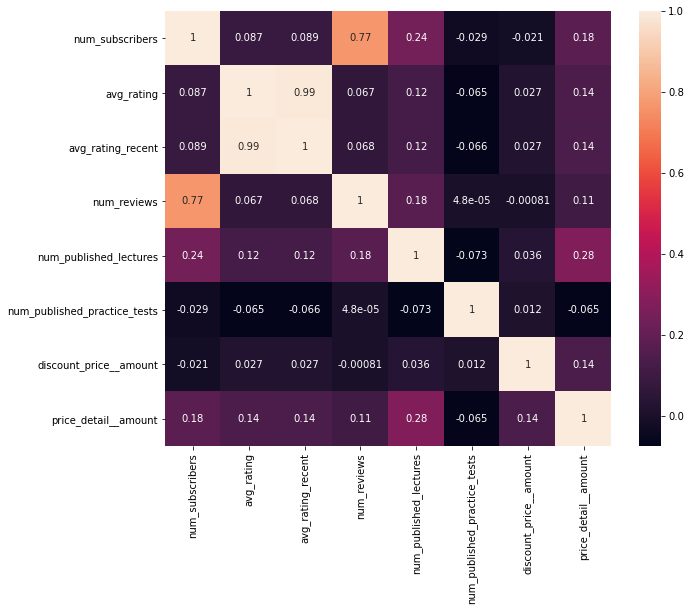

In [55]:
df_finance_accounting_correlated = df_finance_accounting2.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(df_finance_accounting_correlated, xticklabels=df_finance_accounting_correlated.columns, 
            yticklabels=df_finance_accounting_correlated.columns, annot=True);

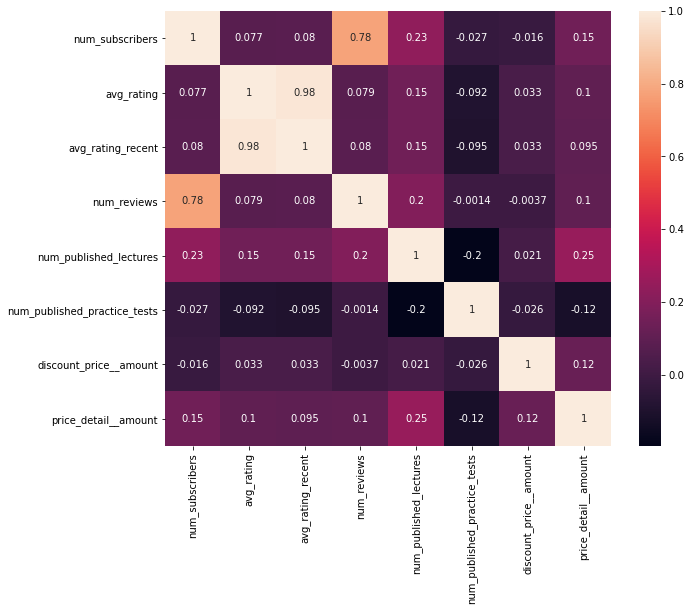

In [56]:
df_it_sw_correlated = df_it_sw2.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(df_it_sw_correlated, xticklabels=df_it_sw_correlated.columns, 
            yticklabels=df_it_sw_correlated.columns, annot=True);

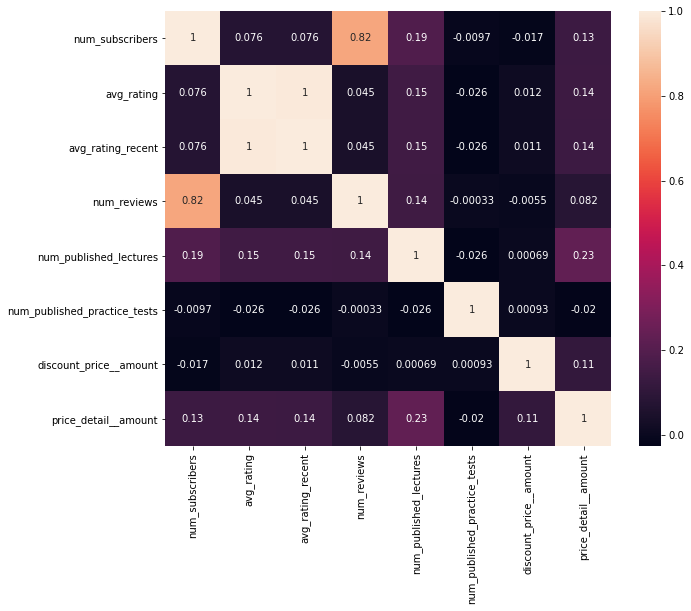

In [57]:
df_lifestyle_correlated = df_lifestyle2.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(df_lifestyle_correlated, xticklabels=df_lifestyle_correlated.columns, 
            yticklabels=df_lifestyle_correlated.columns, annot=True);

Circling back to my main hypotheses, I will make a larger plot to highlight these features.

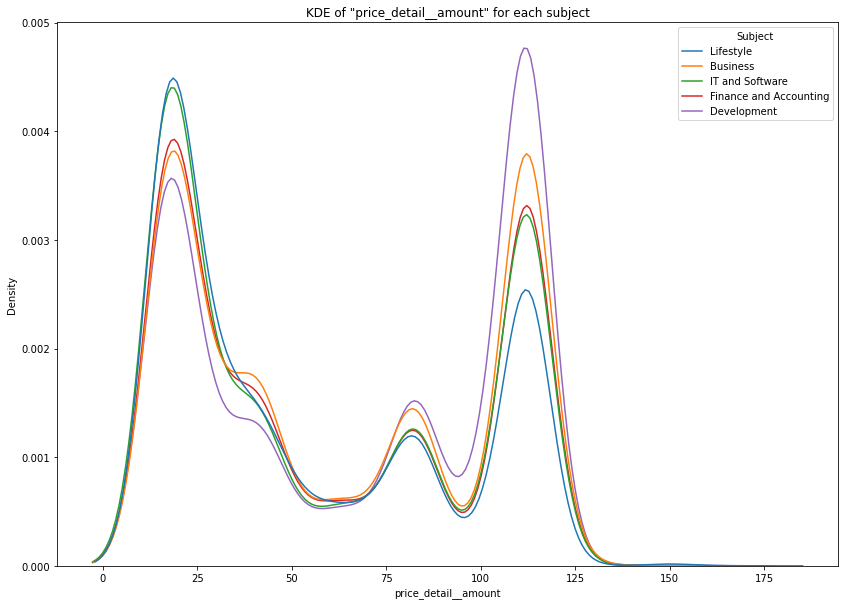

In [58]:
plt.figure(figsize = (14,10))
plt.title('KDE of "price_detail__amount" for each subject')
ax = sns.kdeplot(data=df_combined_final,x='price_detail__amount', hue='Subject');

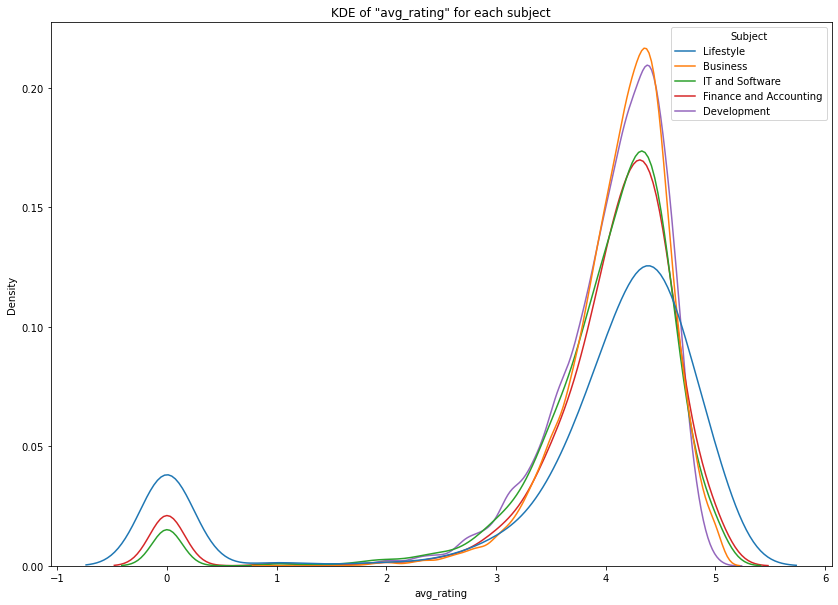

In [59]:
plt.figure(figsize = (14,10))
plt.title('KDE of "avg_rating" for each subject')
ax = sns.kdeplot(data=df_combined_final,x='avg_rating', hue='Subject');

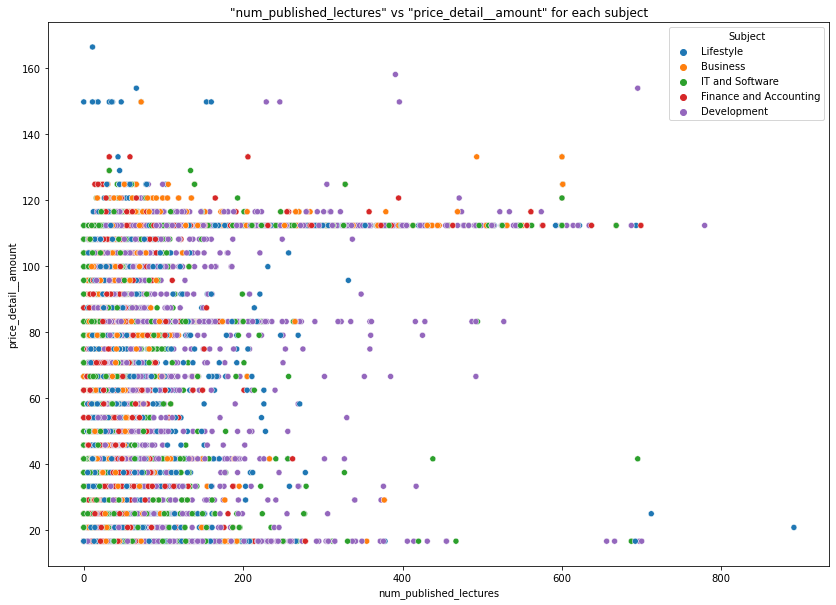

In [60]:
plt.figure(figsize = (14,10))
plt.title('"num_published_lectures" vs "price_detail__amount" for each subject')
ax = sns.scatterplot(data=df_combined_final,x='num_published_lectures', y='price_detail__amount', hue='Subject');

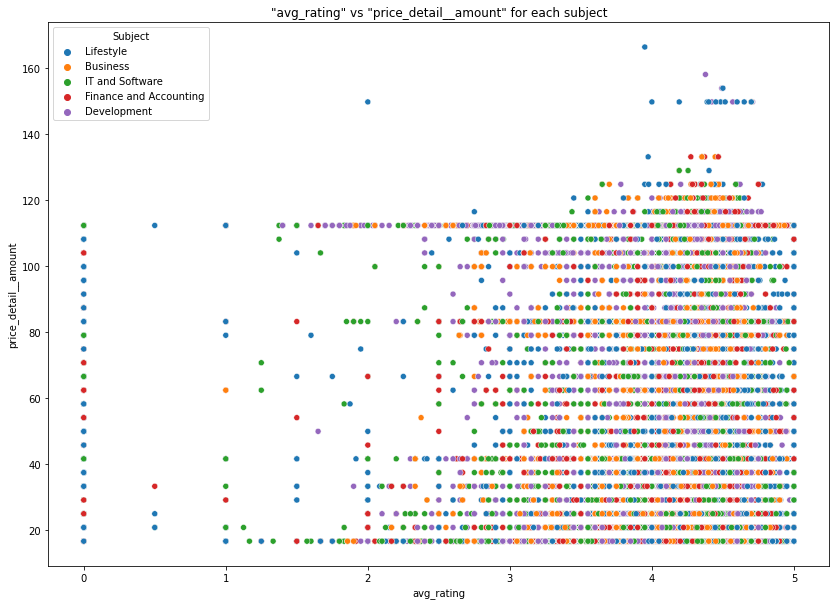

In [61]:
plt.figure(figsize = (14,10))
plt.title('"avg_rating" vs "price_detail__amount" for each subject')
ax = sns.scatterplot(data=df_combined_final,y='price_detail__amount', x='avg_rating', hue='Subject');

## EDA Summary and Discussion

From the EDA above, it is clear that there are some correlations between the _num_subscribers_ and _num_reviews_ features. It also shows that there is essentially no difference between _avg_rating_ and _avg_rating_recent_ in all subjects. Besides these findings, the biggest finding is that there is very little correlation between any of the other features of the dataset. This can be clearly seen with the hue-colored pairplot, especially in the kde plots, where each feature lined up in almost the exact same way across the different subjects. Although I only removed one outlier in my EDA, I may play around with removing further outliers in many of the categories and seeing whether this has any varying effects on my results. Regardless, the lack of correlations was to be expected with such a unique dataset as this, and this EDA has certainly been a good start toward confirming that. I will still carry on with further analyses in order to have concrete numbers to support or disprove my hypotheses.

# Part 3: Models

In [232]:
import random
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import sklearn
import sklearn.neighbors as neighbors
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Analysis 1: Regression Analysis of Rating Feature

I will begin my modelling analyses with a multi-linear regression model focused on predicting the rating of a certain course based on all of the other factors. Based on the results of the EDA, I do not expect to find a good fit. But what sort of failed data scientist would I be if I didn't at least try? For most models I attempt, I will use the sklearn library. I will also create a training and a test dataset using even and odd elements of the larger dataset. I will display the R-squared and the RMSE as metrics for accuracy.

To start off, I will perform a forward stepwise refinement on all the relevant features that may be useful in this analysis. This will show right off the bat whether a certain subset of features will give us better results than others.

In [165]:
mapp = {"Development": 1, "Business": 2, "Finance and Accounting": 3, "IT and Software": 4, "Lifestyle": 5}
df_subject_converted = df_combined_final.replace({'Subject': mapp})
df_subject_converted.head()

,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Subject
0,1322,4.15000,4.20604,37,27,0,2016-03-06T07:08:49Z,2016-03-07T23:07:42Z,6.370,16.64,5
1,1932,4.10000,3.86439,58,36,0,2015-10-21T18:58:35Z,2015-10-26T22:52:48Z,5.915,41.60,2
2,1774,4.25269,4.26677,543,13,0,2017-05-25T20:18:59Z,2017-05-29T15:24:15Z,5.915,112.32,4
4,4542,4.45052,4.42193,1257,21,0,2016-12-14T01:39:37Z,2017-01-04T22:48:34Z,6.084,62.40,4
5,6,4.00000,4.00000,1,6,0,2019-10-04T16:15:13Z,2019-10-26T18:35:55Z,6.240,24.96,3


In [192]:
allowed_factors = ['Subject', 'num_reviews', 'price_detail__amount', 
                   'num_published_lectures', 'num_published_practice_tests',
                  'num_subscribers']

def ForwardStepwise(k, modelParam, factors, dataset):
    funcStr = modelParam + '~'
    best_rsquared = 0
    best_factor = ''

    for i in range(k):
        for factor in factors:
            model = smf.ols(formula=(funcStr + factor), data=dataset).fit()
            if model.rsquared_adj > best_rsquared:
                best_rsquared = model.rsquared_adj
                best_factor = factor

        if best_factor != '':
            funcStr = funcStr + best_factor + '+'
        best_factor = ''
    
    if funcStr[-1] == '+':
        funcStr = funcStr[:-1]
    return funcStr

In [207]:
k = 3
result = ForwardStepwise(k, 'avg_rating', allowed_factors, df_subject_converted)
print(result)
model_k = smf.ols(formula=result, data=df_subject_converted).fit()
model_k.summary()

avg_rating~num_published_lectures+Subject+price_detail__amount


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_rating   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     617.3
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        18:09:54   Log-Likelihood:                -57826.
No. Observations:               43590   AIC:                         1.157e+05
Df Residuals:                   43586   BIC:                         1.157e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.9997      0.013    305.542      0.000       3.974       4.025
num_published_lectures     0.0018   8.59e-05     20.999      0.000       0.002       0.002
Subject                   -0.0760      0.003    -24.267      0.000      -0.082      -0.070
price_detail__amount       0.0019      0.000     16.439      0.000       0.002       0.002
==============================================================================
Omnibus:                    24501.441   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186066.778
Skew:                          -2.681   Prob(JB):                         0.00
Kurtosis:                      11.585   Cond. No.                         270.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the refinement above, it appears that the most important features are:
- Subject
- price_detail__amount
- num_published_lectures

**Multi-Linear Regression, no interactions:**

Now that we have selected which parameters have the most importance, let's display said model with every other variable as their own coefficient, no interactions.

In [252]:
funcStr = 'avg_rating~Subject+num_published_lectures+price_detail__amount'

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

lr = sklearn.linear_model.LinearRegression()
mlr_noInt_courses = lr.fit(train_data[0], train_data[1])
mlr_noInt_courses_prediction = mlr_noInt_courses.predict(test_data[0])
mlr_noInt_courses_r2 = metrics.r2_score(test_data[1], mlr_noInt_courses_prediction)
mlr_noInt_courses_rmse = metrics.mean_squared_error(test_data[1], mlr_noInt_courses_prediction,squared=False)

print(f'Multi-Linear Regression R-squared: {round(mlr_noInt_courses_r2, 5)}')
print(f'Multi-Linear Regression RMSE:      {round(mlr_noInt_courses_rmse, 5)}')

Multi-Linear Regression R-squared: 0.05035
Multi-Linear Regression RMSE:      0.90664


As I suspected, the model is awful. The R-squared is less than 0.05. However, the p-value for each feature appears to be very significant.

**Multi-Linear Regression, with interactions:**

Now let's investigate interactions and see if we can improve to anything worthwhile at all.

In [275]:
funcStr = 'avg_rating~Subject+num_published_lectures+price_detail__amount+Subject:num_published_lectures:price_detail__amount'

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

lr = sklearn.linear_model.LinearRegression()
mlr_wInt_courses = lr.fit(train_data[0], train_data[1])
mlr_wInt_courses_prediction = mlr_wInt_courses.predict(test_data[0])
mlr_wInt_courses_r2 = metrics.r2_score(test_data[1], mlr_wInt_courses_prediction)
mlr_wInt_courses_rmse = metrics.mean_squared_error(test_data[1], mlr_wInt_courses_prediction,squared=False)

print(f'Multi-Linear Regression R-squared: {round(mlr_wInt_courses_r2,5)}')
print(f'Multi-Linear Regression RMSE:      {round(mlr_wInt_courses_rmse,5)}')

Multi-Linear Regression R-squared: 0.05803
Multi-Linear Regression RMSE:      0.90296


This gave only a miniscule improvement to the accuracy of the model. Let's try adding back a few more features to see if somewhere in there is hidden a better correlation.

In [276]:
funcStr = 'avg_rating~Subject:num_subscribers:num_reviews:num_published_lectures:price_detail__amount'

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

lr = sklearn.linear_model.LinearRegression()
mlr_wInt_courses2 = lr.fit(train_data[0], train_data[1])
mlr_wInt_courses2_prediction = mlr_wInt_courses2.predict(test_data[0])
mlr_wInt_courses2_r2 = metrics.r2_score(test_data[1], mlr_wInt_courses2_prediction)
mlr_wInt_courses2_rmse = metrics.mean_squared_error(test_data[1], mlr_wInt_courses2_prediction,squared=False)

print(f'Multi-Linear Regression R-squared: {round(mlr_wInt_courses2_r2,5)}')
print(f'Multi-Linear Regression RMSE:      {round(mlr_wInt_courses2_rmse,5)}')

Multi-Linear Regression R-squared: 0.00046
Multi-Linear Regression RMSE:      0.93015


Shotgunning the amount of features to include a lot more did not pay off, as it made the model much much worse, which is a pretty impressive thing to do at this point. It is safe to say that the fit is not linear.

**Multiple-Non-Linear Regression:**

Let's try using only one feature at a time for the top three most important features to see if any of them have a polynomial fit of degress 2, 3, 4 or 5.

In [261]:
features = ['Subject','price_detail__amount','num_published_lectures']
funcStr = 'avg_rating~'
degrees = [2,3,4,5]
pad_max = 22
print('Mulitple-Non-Linear Regression Results:')
for j in degrees:
    print(f'Polynomials of degree {j}:')
    for i in features:
        y,X = patsy.dmatrices(funcStr+i, data=df_subject_converted)
        
        train_data = (X[::2], y[::2])
        test_data = (X[1::2], y[1::2])
        
        X_poly_train = PolynomialFeatures(j).fit_transform(train_data[0])
        X_poly_test = PolynomialFeatures(j).fit_transform(test_data[0])
        ss = sm.OLS(train_data[1], X_poly_train).fit()
        ss_pred = ss.predict(X_poly_test)
        ss_r2 = metrics.r2_score(test_data[1], ss_pred)
        ss_rmse = metrics.mean_squared_error(test_data[1], ss_pred,squared=False)
        padding = " "*(pad_max - len(i))
        print(f'    Feature: {i}' + padding + f' -- R-squared: {round(ss_r2,5)} | RMSE: {round(ss_rmse,5)}')

Mulitple-Non-Linear Regression Results:
Polynomials of degree 2:
    Feature: Subject                -- R-squared: 0.02287 | RMSE: 0.91966
    Feature: price_detail__amount   -- R-squared: 0.01718 | RMSE: 0.92234
    Feature: num_published_lectures -- R-squared: 0.03285 | RMSE: 0.91496
Polynomials of degree 3:
    Feature: Subject                -- R-squared: 0.02287 | RMSE: 0.91966
    Feature: price_detail__amount   -- R-squared: 0.01801 | RMSE: 0.92195
    Feature: num_published_lectures -- R-squared: 0.03931 | RMSE: 0.9119
Polynomials of degree 4:
    Feature: Subject                -- R-squared: 0.02665 | RMSE: 0.91788
    Feature: price_detail__amount   -- R-squared: 0.01799 | RMSE: 0.92196
    Feature: num_published_lectures -- R-squared: 0.04389 | RMSE: 0.90972
Polynomials of degree 5:
    Feature: Subject                -- R-squared: 0.02665 | RMSE: 0.91788
    Feature: price_detail__amount   -- R-squared: 0.01787 | RMSE: 0.92201
    Feature: num_published_lectures -- R-square

It looks like using a polynomial fit regression model also doesn't do much to improve model accuracy. The closest fit was a degree 5 polynomial based on num_published_lectures. And by closest fit, I mean still not very close at all.

**Random Forest Generation:**

Our last hope is to attempt a random forest regression model.

In [277]:
funcStr = "avg_rating ~ 0+Subject+price_detail__amount+num_published_lectures"\
            + "+Subject:num_published_lectures:price_detail__amount"

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

rf = RandomForestRegressor(n_estimators = 1000, random_state=42)
rf_courses = rf.fit(train_data[0], train_data[1])

In [278]:
rf_courses_predictions = rf_courses.predict(test_data[0])
rf_courses_r2 = metrics.r2_score(test_data[1], rf_courses_predictions)
rf_courses_rmse = metrics.mean_squared_error(test_data[1],rf_courses_predictions,squared=False)

print(f'Random Forest R-squared: {round(rf_courses_r2,5)}')
print(f'Random Forest RMSE:      {round(rf_courses_rmse,5)}')

Random Forest R-squared: -0.03459
Random Forest RMSE:      0.94632


**Analysis 1 Results and Discussion:**

The results of each model used are summarized in the table below. All of them had an R-squared less than 0.1 and an RMSE around 0.9. It is imporant to relate the RMSE to the range of the data being analyzed, which is on a scale of 0 to 5. This is a pretty clear indication that the data does not have any meaningful fit for average course rating.

| Model                                     | R^2      | RMSE    |
|-------------------------------------------|----------|---------|
| Multilinear Regression (no interaction)   | 0.05035  | 0.90664 |
| Multilinear Regression (with interaction) | 0.06424  | 0.89998 |
| Multi-Non-Linear Regression               | 0.04719  | 0.90815 |
| Random Forest Generation                  | -0.03356 | 0.94584 |

The least bad model was a multilinear regression model with interactions between the three most important features. The three most important features were determined using a forward stepwise refinement to be _Subject_, _price_detail__amount_ and _num_published_lectures_.

### Analysis 2: Regression Analysis of Price Feature

As we just experienced with the regression analyses of average rating, there does not appear to be a model that predicts course rating with any rhyme or reason, given the dataset we are working with. On the path to answering my original reasearch questions, I will now try to fit a model for predicting the price of a class using the other features of the dataset. Fingers crossed I get better results.

In [265]:
allowed_factors = ['Subject', 'num_reviews', 'avg_rating', 
                   'num_published_lectures', 'num_published_practice_tests',
                  'num_subscribers']

In [269]:
k = 6
result = ForwardStepwise(k, 'price_detail__amount', allowed_factors, df_subject_converted)
print(result)
model_k = smf.ols(formula=result, data=df_subject_converted).fit()
model_k.summary()

price_detail__amount~num_published_lectures+avg_rating+num_subscribers+Subject+num_published_practice_tests+num_reviews


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     price_detail__amount   R-squared:                       0.090
Model:                              OLS   Adj. R-squared:                  0.090
Method:                   Least Squares   F-statistic:                     717.6
Date:                  Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                          21:55:16   Log-Likelihood:            -2.2024e+05
No. Observations:                 43590   AIC:                         4.405e+05
Df Residuals:                     43583   BIC:                         4.405e+05
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       46.4600      0.941     49.361      0.000      44.615      48.305
num_published_lectures           0.1641      0.004     45.576      0.000       0.157       0.171
avg_rating                       3.1337      0.198     15.795      0.000       2.745       3.523
num_subscribers                  0.0003   2.17e-05     14.993      0.000       0.000       0.000
Subject                         -1.8816      0.131    -14.349      0.000      -2.139      -1.625
num_published_practice_tests    -2.6078      0.265     -9.843      0.000      -3.127      -2.088
num_reviews                     -0.0008      0.000     -6.356      0.000      -0.001      -0.001
==============================================================================
Omnibus:                  1466600.235   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3584.589
Skew:                           0.211   Prob(JB):                         0.00
Kurtosis:                       1.660   Cond. No.                     7.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the refinement above, it appears that every feature has some level of importance in fitting the prediction of course price. That being said, the R-squared is only a smidge better than the average rating. So, not good. Let's attempt to create a better model.

**Multi-Linear Regression, no interactions:**

In [284]:
funcStr = 'price_detail__amount~num_published_lectures+avg_rating+num_subscribers+Subject+num_published_practice_tests+num_reviews'

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

lr = sklearn.linear_model.LinearRegression()
mlr_noInt_courses = lr.fit(train_data[0], train_data[1])
mlr_noInt_courses_prediction = mlr_noInt_courses.predict(test_data[0])
mlr_noInt_courses_r2 = metrics.r2_score(test_data[1], mlr_noInt_courses_prediction)
mlr_noInt_courses_rmse = metrics.mean_squared_error(test_data[1], mlr_noInt_courses_prediction,squared=False)

print(f'Multi-Linear Regression R-squared: {round(mlr_noInt_courses_r2, 5)}')
print(f'Multi-Linear Regression RMSE:      {round(mlr_noInt_courses_rmse, 5)}')

Multi-Linear Regression R-squared: 0.08858
Multi-Linear Regression RMSE:      37.91788


Using a basic multi-linear regression with no interactions, a meager R-squared is achieved that barely approaches 0.1. However, the RMSE is much lower than expected for such a poor R-squared.

**Multi-Linear Regression, with interactions:**

Now let's investigate interactions and see if we can improve to anything worthwhile at all.

In [300]:
funcStr = 'price_detail__amount~num_published_lectures+avg_rating+'\
            'Subject+num_published_lectures:avg_rating:Subject'

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

lr = sklearn.linear_model.LinearRegression()
mlr_wInt_courses = lr.fit(train_data[0], train_data[1])
mlr_wInt_courses_prediction = mlr_wInt_courses.predict(test_data[0])
mlr_wInt_courses_r2 = metrics.r2_score(test_data[1], mlr_wInt_courses_prediction)
mlr_wInt_courses_rmse = metrics.mean_squared_error(test_data[1], mlr_wInt_courses_prediction,squared=False)

print(f'Multi-Linear Regression R-squared: {round(mlr_wInt_courses_r2,5)}')
print(f'Multi-Linear Regression RMSE:      {round(mlr_wInt_courses_rmse,5)}')

Multi-Linear Regression R-squared: 0.08596
Multi-Linear Regression RMSE:      37.97241


After a couple tries fine tuning the function for this model, the above function was settled on to give the best bad results. It appears that having interactions only makes the model worse for the price feature.

**Multiple-Non-Linear Regression:**

Let's try using only one feature at a time for the top three most important features to see if any of them have a polynomial fit of degress 2, 3, 4 or 5.

In [301]:
features = ['num_published_lectures','avg_rating','num_subscribers','Subject',
           'num_published_practice_tests','num_reviews']
funcStr = 'price_detail__amount~'
degrees = [2,3,4,5]
pad_max = 28
print('Mulitple-Non-Linear Regression Results:')
for j in degrees:
    print(f'Polynomials of degree {j}:')
    for i in features:
        y,X = patsy.dmatrices(funcStr+i, data=df_subject_converted)
        
        train_data = (X[::2], y[::2])
        test_data = (X[1::2], y[1::2])
        
        X_poly_train = PolynomialFeatures(j).fit_transform(train_data[0])
        X_poly_test = PolynomialFeatures(j).fit_transform(test_data[0])
        ss = sm.OLS(train_data[1], X_poly_train).fit()
        ss_pred = ss.predict(X_poly_test)
        ss_r2 = metrics.r2_score(test_data[1], ss_pred)
        ss_rmse = metrics.mean_squared_error(test_data[1], ss_pred,squared=False)
        padding = " "*(pad_max - len(i))
        print(f'    Feature: {i}' + padding + f' -- R-squared: {round(ss_r2,5)} | RMSE: {round(ss_rmse,5)}')

Mulitple-Non-Linear Regression Results:
Polynomials of degree 2:
    Feature: num_published_lectures       -- R-squared: 0.09451 | RMSE: 37.79437
    Feature: avg_rating                   -- R-squared: 0.01491 | RMSE: 39.42053
    Feature: num_subscribers              -- R-squared: 0.02948 | RMSE: 39.12789
    Feature: Subject                      -- R-squared: 0.01311 | RMSE: 39.45667
    Feature: num_published_practice_tests -- R-squared: 0.00571 | RMSE: 39.60418
    Feature: num_reviews                  -- R-squared: 0.01808 | RMSE: 39.35715
Polynomials of degree 3:
    Feature: num_published_lectures       -- R-squared: 0.10194 | RMSE: 37.63889
    Feature: avg_rating                   -- R-squared: 0.01539 | RMSE: 39.41089
    Feature: num_subscribers              -- R-squared: -1.66376 | RMSE: 64.82359
    Feature: Subject                      -- R-squared: 0.01364 | RMSE: 39.4459
    Feature: num_published_practice_tests -- R-squared: 0.00571 | RMSE: 39.60417
    Feature: num_re

The results show that a polynomial fit of degree 5 about the _num_published_lectures_ feature offers the most accurate model yet. The results also show that the _num_subscribers_ and _num_reviews_ features go unstable after degree 2, when their R-squared results become negative and their RMSE results skyrocket.

**Random Forest Generation:**

Finally, let us attempt a random forest model.

In [304]:
funcStr = 'price_detail__amount~num_published_lectures+avg_rating+'\
            'Subject+num_published_lectures:avg_rating:Subject'

funcStr = 'price_detail__amount~num_published_lectures+avg_rating+'\
            'num_published_lectures:avg_rating'

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

rf = RandomForestRegressor(n_estimators = 1000, random_state=42)
rf_courses = rf.fit(train_data[0], train_data[1])

In [305]:
rf_courses_predictions = rf_courses.predict(test_data[0])
rf_courses_r2 = metrics.r2_score(test_data[1], rf_courses_predictions)
rf_courses_rmse = metrics.mean_squared_error(test_data[1],rf_courses_predictions,squared=False)

print(f'Random Forest R-squared: {round(rf_courses_r2,5)}')
print(f'Random Forest RMSE:      {round(rf_courses_rmse,5)}')

Random Forest R-squared: 0.06688
Random Forest RMSE:      38.36663


**Analysis 2 Results and Discussion:**

The results of the regression analyses are shown in the table below. Although there was slightly better fit for the pricing feature, the results are still quite terrible. The best R-squared result of 0.11066 came from a multi-non-linear polynomial model with a degree of 5, using the _num_published_lectures_ feature. The RMSE for all of the models sat really close to 38, with the understanding that the mean of the _price_detail__amount_ feature is 60.5.

| Model                                     | R^2     | RMSE     |
|-------------------------------------------|---------|----------|
| Multilinear Regression (no interaction)   | 0.08858 | 37.91788 |
| Multilinear Regression (with interaction) | 0.08596 | 37.97241 |
| Multi-Non-Linear Regression               | 0.11066 | 37.45579 |
| Random Forest Generation                  | 0.06688 | 38.36663 |

These results further confirm the overwhelmingly obvious conclusion that the dataset we are working with does not offer any good predictions for average course rating or for course price.

### Analysis 3: Classification Analysis of Subject Feature

Hopefully a classification analysis of the Subject feature will give better results than the previous regression analyses. For this analysis, I will perform a multi-category logistic regession, a KNN model, and both an LDA and QDA model. I will record the model accuracy score and the F1 score for each.

To start, I will set up a data matrix using patsy. I will set it up as a function of the following factors, as well as their interactions:

- avg_rating
- num_reviews
- price_detail__amount
- num_published_lectures
- num_published_practice_tests
- num_subscribers

Then I will split this data matrix into training data and test data use these data to run my analyses.

**Multi-Category Logistic Regression**

In [342]:
funcStr = "C(Subject,[[1],[2],[3],[4],[5]]) ~ 0 +avg_rating+num_reviews"\
            + "+num_published_lectures+num_published_practice_tests"\
            + "+num_published_lectures:num_published_practice_tests"

y,X = patsy.dmatrices(funcStr, data = df_combined_final)
y = y.ravel()

ilr = sklearn.linear_model.LogisticRegression(max_iter=50000)

train_data = (X[::2], y[::2])
test_data = (X[1::2], y[1::2])

model_lr_courses = ilr.fit(train_data[0],train_data[1])

model_lr_courses_prediction = model_lr_courses.predict(test_data[0])
model_lr_courses_score = model_lr_courses.score(test_data[0],test_data[1])
model_lr_courses_f1 = metrics.f1_score(test_data[1], model_lr_courses_prediction,average='macro')
print(f"Multi-Category Logistic Regression accuracy: {round(model_lr_courses_score,5)}")
print(f"Multi-Category Logistic Regression F1 score: {round(model_lr_courses_f1,5)}")


Multi-Category Logistic Regression accuracy: 0.29456
Multi-Category Logistic Regression F1 score: 0.24112


Logistic regression gives a prediction accuracy of roughly 0.29, which is pretty bad. This level of accuracy was achieved after cutting _price_detail__amount_ and _num_subscribers_ from the model, as well as limiting the interactions to only between _num_published_lectures_ and _num_published_practice_tests_. The next method to try with is a K-Nearest Neighbors approach.

**K-Nearest Neighbors**

Let's try running one with varying numbers for k to see if we can hone in on the most accurate configuration.

In [338]:
kvals = [1, 5, 10, 25, 50, 75, 100, 150, 200, 300, 500]

for k in kvals:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    mod = clf.fit(train_data[0],train_data[1])
    results = mod.predict(test_data[0])
    accuracy = np.sum(results == test_data[1]) / len(test_data[1])
    print(f'KNN(k = {k})\n\tPrediction accuracy: {accuracy}')

KNN(k = 1)
	Prediction accuracy: 0.20486350080293644
KNN(k = 5)
	Prediction accuracy: 0.2558384950676761
KNN(k = 10)
	Prediction accuracy: 0.27749483826565724
KNN(k = 25)
	Prediction accuracy: 0.2989217710484056
KNN(k = 50)
	Prediction accuracy: 0.30763936682725396
KNN(k = 75)
	Prediction accuracy: 0.31213581096581783
KNN(k = 100)
	Prediction accuracy: 0.3134205092911218
KNN(k = 150)
	Prediction accuracy: 0.316815783436568
KNN(k = 200)
	Prediction accuracy: 0.3173204863500803
KNN(k = 300)
	Prediction accuracy: 0.31805459967882543
KNN(k = 500)
	Prediction accuracy: 0.318742830924524


It appears that the most optimal k value for the amount of computation time sits somewhere around 150. We will use K=150 for our KNN analyses now. Let's create a confusion matrix to get another look of how the model performs.

In [351]:
k = 150
clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
model_knn_courses = clf.fit(train_data[0],train_data[1])
model_knn_courses_prediction = mod.predict(test_data[0])
model_knn_courses_accuracy = np.sum(results == test_data[1]) / len(test_data[1])
model_knn_courses_f1 = metrics.f1_score(test_data[1], model_knn_courses_prediction,average='macro')

model_knn_courses_cm = metrics.confusion_matrix(test_data[1], model_knn_courses_prediction)
print(f"KNN accuracy: {model_knn_courses_accuracy.mean()}")
print(f"KNN F1 score: {round(model_knn_courses_f1,5)}")
print(f"Confusion Matrix:\n {model_knn_courses_cm}") 

KNN accuracy: 0.318742830924524
KNN F1 score: 0.2647
Confusion Matrix:
 [[1824 1987  166   97  373]
 [1247 3327   41   35   33]
 [1614 1668  149  100  737]
 [1464 1803  130  337  543]
 [1263 1354  160   33 1310]]


As you can see, although a KNN analysis gives us better results than we were achieving for our previous analyses, it still isn't great.

**Linear Discriminant Analysis**

The last methods to check with are a linear and a quadratic discriminate analysis.

In [352]:
ilda = LinearDiscriminantAnalysis()
model_lda_courses = ilda.fit(train_data[0], train_data[1])

model_lda_courses_predict = model_lda_courses.predict(test_data[0])

model_lda_courses_score = model_lda_courses.score(test_data[0], test_data[1])
model_lda_courses_cm = metrics.confusion_matrix(test_data[1], model_lda_courses_predict)
model_lda_courses_f1 = metrics.f1_score(test_data[1], model_lda_courses_predict,average='macro')

print(f"LDA accuracy: {round(model_lda_courses_score,5)}")
print(f"LDA F1 score: {round(model_lda_courses_f1,5)}")
print(f"Confusion Matrix:\n {model_lda_courses_cm}") 


LDA accuracy: 0.2897
LDA F1 score: 0.23862
Confusion Matrix:
 [[2848  773    0  171  655]
 [1866 1925    0   72  820]
 [2537  672    0  175  884]
 [2178  860    0  486  753]
 [2330  675    0   60 1055]]


**Quadratic Discriminant Analysis**

In [353]:
iqda = QuadraticDiscriminantAnalysis()
model_qda_courses = iqda.fit(train_data[0], train_data[1])

model_qda_courses_predict = model_qda_courses.predict(test_data[0])

model_qda_courses_score = model_qda_courses.score(test_data[0], test_data[1])
model_qda_courses_cm = sklearn.metrics.confusion_matrix(test_data[1], model_qda_courses_predict)
model_qda_courses_f1 = metrics.f1_score(test_data[1], model_qda_courses_predict,average='macro')

print(f"QDA accuracy: {round(model_qda_courses_score,5)}")
print(f"QDA F1 score: {round(model_qda_courses_f1,5)}")
print(f"Confusion Matrix:\n {model_qda_courses_cm}") 


QDA accuracy: 0.24859
QDA F1 score: 0.17256
Confusion Matrix:
 [[  63  392   10  111 3871]
 [  54 1204    4   27 3394]
 [  65  331   13  112 3747]
 [  76  436   13  419 3333]
 [  36  332    7   26 3719]]


**Analysis 3 Discussion:**

The table below shows the results for each model tested. It shows that the most accurate model for predicting subject is the K-Nearest Neighbors model with K = 150. It was also discovered from playing around with the logistic regression model that excluding the _price_detail__amount_ and _num_subscribers_ features from each model raised the overall accuracy.

| Model                              | Accuracy | F1      |
|------------------------------------|----------|---------|
| Multi-Category Logistic Regression | 0.29456  | 0.24112 |
| K-Nearest Neighbors                | 0.31874  | 0.26470 |
| Linear Discriminant Analysis       | 0.28970  | 0.23862 |
| Quadratic Discriminant Analysis    | 0.24859  | 0.17256 |

The F1 score for each model was taken using the macro setting, which calculates metrics for each label separately and averages them together. The fact that the F1 score lagged behind the accuracy for each model, while the F1 score with micro setting exactly matched the accuracy, shows that there was a meaningful label imbalance in the data.

## Final Discussion and Conclusion

As was made clear by all three of the analyses performed, my dataset was a flop in terms of having any meaningful relationships that could predict course price or average rating, or categorize based on subject. This was already beginning to look like the most likely outcome based on the results of the EDA, but I have now definitively shown that this is true. I provide my results and a brief discussion after each individual analysis, but the key takeaways I have are:

- The data has absolutely no meaningful predictive capabilities for course price or average course rating. Both regression analyses gave a best case result with R^2 no greater than 0.11 and RMSE no lower than 0.89 for rating and 37.4 for price.
- The data has a slight liklihood of classifying subject with a maximum accuracy of .319, but only when factoring in _avg_rating_, _num_reviews_, _num_published_lectures_ and _num_published_practice_tests_.

Tying everything back to my original three hypotheses, here is a summary of how I would conclude them:

1. The data contains no relationships for predicting course price.
    - Correct. The data contains no relationships for predicting course price.


2. The data contains a relationship for predicting course rating.
    - Incorrect. The data contains no relationships for predicting course rating.
    

3. The data contains a relationship for accurately classifying course subject.
    - Incorrect. The data contains only a small relationship for classifying course subject.

If I had more time to work with this dataset, I would go back and attempt to do further cleaning of the data. Looking back to the pairplots of the data, there are some pretty strange trends in the features like _discount_price__amount_ vs _detailed_price__amount_ that must have some reasoning behind them. There is also a lot more that could be done to remove imbalances in the data, as indicated in the differences between accuracy and macro F1 score in the third analysis.

In the end, though, I have just come to believe that the data doesn't show anything meaningful. There is no correlation between how many people review a course and how good of a rating it got, or between the price of the course and the rating. This is likely the result of Udemy being open to everyone, and having an inconsistent course structure that does not necessarily incentivise anybody to participate and take the same interest as something like a true university course. But then again, I could be wrong. After all, I'd already admitted that I'm no good at this data science stuff.

## Sources

Kothari, Jil. https://www.kaggle.com/jilkothari.

Shin, Terence. An Extensive Step by Step Guide to Exploratory Data Analysis: My personal guide to performing EDA for any datase. Towards Data Science. Jan 11, 2020. https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e.